# 1. Introducing Docstrings

In this mission, we'll cover some best practices that will make your code much easier to use, read, and maintain, including:

* How to document your code so that others can easily understand it.
* How to create functions that are easier to test, debug, and change.
* How to setup default arguments in functions so that your code doesn't behave unexpectedly.

In [1]:
#Let's start by looking at this split_and_stack() function:

def split_and_stack(df, new_names):
    half = int(len(df.columns) / 2)
    left = df.iloc[:, :half]
    right = df.iloc[:, half:]
    return pd.DataFrame(
      data=np.vstack([left.values, right.values]),
       columns=new_names)

* If we wanted to understand what the function does, what the arguments are supposed to be, and what it returns, we would have to spend some time deciphering the code.

**With a docstring though, it is much easier to tell what the expected inputs and outputs should be, as well as what the function does. A docstring is a string written as the first line of a function.**

In [2]:
def split_and_stack(df, new_names):
    """Splits a DataFrame's columns into two halves and then stack
    them vertically, returning a new DataFrame with `new_names` as the
    column names.

    Args:
      df (DataFrame): The DataFrame to split.
      new_names (iterable of str): The column names for the new DataFrame.

    Returns:
      DataFrame
    """
    half = int(len(df.columns) / 2)
    left = df.iloc[:, :half]
    right = df.iloc[:, half:]
    return pd.DataFrame(
      data=np.vstack([left.values, right.values]),
      columns=new_names
    )

Every docstring has some (although usually not all) of these five key pieces of information:

* Description of what the function does.
* Description of the arguments, if any.
* Description of the return value(s), if any.
* Description of errors raised, if any.
* Optional extra notes or examples of usage.

# 2. Retrieving Docstrings

**Every function in Python comes with a` __doc__` attribute that holds the contents of the function's docstring.**

In [3]:
split_and_stack.__doc__

"Splits a DataFrame's columns into two halves and then stack\n    them vertically, returning a new DataFrame with `new_names` as the\n    column names.\n\n    Args:\n      df (DataFrame): The DataFrame to split.\n      new_names (iterable of str): The column names for the new DataFrame.\n\n    Returns:\n      DataFrame\n    "

* Notice that the `__doc__ `attribute contains the raw docstring, including any tabs or spaces that were added to make the words visually line up.

**To get a cleaner version, with those leading spaces removed, we can use the getdoc() function from the inspect module.**

In [4]:
import inspect
print(inspect.getdoc(split_and_stack))

Splits a DataFrame's columns into two halves and then stack
them vertically, returning a new DataFrame with `new_names` as the
column names.

Args:
  df (DataFrame): The DataFrame to split.
  new_names (iterable of str): The column names for the new DataFrame.

Returns:
  DataFrame


**The inspect module contains a lot of useful methods for gathering information about functions**

* In jupyter notebooks, we can use to access the docstrings for built-in functions - just press Shift + Tab while the cursor is within the parentheses of a built-in function.

# 3. Google Style Docstrings

* Consistent style makes a project easier to read, and the Python community has evolved several standards for how to format docstrings. `Google style` and `Numpydoc` are the most popular formats.
* However, since Numpydoc takes up more vertical space, we'll focus on Google style in this mission to keep the examples compact and legible.

**Description of what the function does**

In Google style, the docstring starts with a concise description of what the function does. This should be in imperative language.

**Description of the arguments, if any**

Next comes the "Args" section where you list each argument name, followed by its expected type in parentheses, and then its role in the function. 

**Description of the return value(s), if any**

The next section is the "Returns" section, where you list the expected type or types of what gets returned. You can also provide some comment about what gets returned, but often the name of the function and the description will make this clear. Additional lines should not be indented.

In [5]:
def count_letter(content, letter):
    """Counts the number of times `letter` appears in `content`.        ## description what function does

    Args:
      content (str): The string to search.                              ## Description of arguments
      letter (str): The letter to search for.

    Returns:                                                            ## Description of return value(s)            
      int
    """
    if (not isinstance(letter, str)) or len(letter) != 1:
        raise ValueError('`letter` must be a single character string.')
    return len([char for char in content if char == letter])

# 4. Google Style Docstrings Continued

In [6]:
def count_letter(content, letter):
    """Counts the number of times `letter` appears in `content`.        ## description what function does

    Args:
      content (str): The string to search.                              ## Description of arguments
      letter (str): The letter to search for.

    Returns:                                                            ## Description of return value(s)            
      int
      
    Raises:
      ValueError: If `letter` is not a one-character string.            ##  Description of error raised
    """
    if (not isinstance(letter, str)) or len(letter) != 1:
        raise ValueError('`letter` must be a single character string.')
    return len([char for char in content if char == letter])
print(inspect.getdoc(count_letter))

Counts the number of times `letter` appears in `content`.        ## description what function does

Args:
  content (str): The string to search.                              ## Description of arguments
  letter (str): The letter to search for.

Returns:                                                            ## Description of return value(s)            
  int
  
Raises:
  ValueError: If `letter` is not a one-character string.            ##  Description of error raised


# 5. Don't Repeat Yourself

**The `Don't repeat yourself` principle, also known as DRY, and the` Do One Thing` principle are good ways to ensure that our functions are well designed and easy to test.**

<block><pre> #Suppose we wrote the code for the train dataset, then copied it and pasted it into the next two blocks, updating the paths and the variable names:

def function(arg_1, arg_2=42):
    """Description of what the function does.
    """
train = pd.read_csv('train.csv')
train_y = train['labels'].values
train_X = train[col for col in train.columns if col != 'labels'].values
train_pca = PCA(n_components=2).fit_transform(train_X)
plt.scatter(train_pca[:,0], train_pca[:,1])



val = pd.read_csv('validation.csv')
val_y = val['labels'].values
val_X = train[col for col in val.columns if col != 'labels'].values
val_pca = PCA(n_components=2).fit_transform(val_X)
plt.scatter(val_pca[:,0], val_pca[:,1])


test = pd.read_csv('test.csv')
test_y = test['labels'].values
test_X = test[col for col in test.columns if col != 'labels'].values
test_pca = PCA(n_components=2).fit_transform(train_X)
plt.scatter(test_pca[:,0], test_pca[:,1])
</block></pre>

* But one of the problems with copying and pasting is that it is easy to accidentally introduce errors that are hard to spot.
  Notice in the last block, we accidentally took the principal components of the train data instead of the test data.
* Another problem with repeated code is that if we want to change something, we often have to do it in multiple places. For instance, if we realized that our CSVs used the column name "label" instead of "labels," we would have to change our code in six places. Repeated code like this is a good sign that we should write a function.

## TODO:
While you were developing a model to predict the likelihood of a student graduating from college, you wrote this bit of code in the code editor to get the z-scores of students' yearly GPAs. Now you're ready to turn it into a production-quality system, so you need to do something about the repetition. Writing a function to calculate the z-scores would improve this code.

* Write a function named standardize() that returns the z-scores of a column.
* Use the function to calculate df['y1_z'], df['y2_z'], df['y3_z'], and df[y4_z'] (i.e. the z-scores for each year), just like the commented code in the code editor.
* Optional Exercise: Add a docstring to the function.

In [7]:
## calculating z scores for each year 
# df['y1_z'] = (df['y1_gpa'] - df['y1_gpa'].mean()) / df['y1_gpa'].std()
# df['y2_z'] = (df['y2_gpa'] - df['y2_gpa'].mean()) / df['y2_gpa'].std()
# df['y3_z'] = (df['y3_gpa'] - df['y3_gpa'].mean()) / df['y3_gpa'].std()
# df['y4_z'] = (df['y4_gpa'] - df['y4_gpa'].mean()) / df['y4_gpa'].std()

In [8]:
def standardize(column):
    """Standardizes the values in a column.

    Args:
      column (pandas Series): The data to standardize.

    Returns:
      pandas Series: the values as z-scores
    """
    # Finish the function so that it returns the z-scores
    z_score = (column - column.mean()) / column.std()
    return z_score

# 6. Do One Thing

In [9]:
def mean_and_median(values):
    """Gets the mean and median of a list of `values`

    Args:
      values (iterable of float): A list of numbers

    Returns:
      tuple (float, float): The mean and median
    """
    mean = sum(values) / len(values)
    midpoint = int(len(values) / 2)
    if len(values) % 2 == 0:
        median = (values[midpoint - 1] + values[midpoint]) / 2
    else:
        median = values[midpoint]

    return mean, median

## This function violates another software engineering principle: Do One Thing. Every function should have a single responsibility.

**Instead of one big function, we could have a more nimble function that just find mean a second one for median.**

We get several advantages from splitting the mean_and_median() function into two smaller functions. Our code becomes:

* More flexible
* More easily understood
* Simpler to test
* Simpler to debug
* Easier to change

In [10]:
def find_mean(values):
    """Gets the mean of a list of values

    Args:
      values (iterable of float): A list of numbers

    Returns:
      float
    """
    mean = sum(values) / len(values)
    return mean

In [11]:
def find_median(values):
    """Gets the median of a list of values

    Args:
      values (iterable of float): A list of numbers

    Returns:
      float
    """
    midpoint = int(len(values) / 2)
    if len(values) % 2 == 0:
        median = (values[midpoint - 1] + values[midpoint]) / 2
    else:
        median = values[midpoint]
    return median

# 7. Pass by Assignment

**Another important thing to keep in mind when writing functions is that the way that Python passes information to functions is different from many other languages. It is referred to as pass by assignment.**

In [12]:
a = [1, 2, 3]
b = a
a.append(4)
print(b)
b.append(5)
print(a)
a=42
print(a)

[1, 2, 3, 4]
[1, 2, 3, 4, 5]
42


# 8. Pass by Assignment Continued

**if we type b = a, the interpreter says, "Okay, now b points to whatever a is pointing to**.

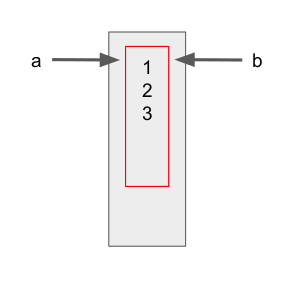

* So if we were to append 4 to the end of a, both variables get it because there is only one list.
* Likewise, if we append 5 to b, both variables get it.

# 9. Mutable and Immutable Variables

In [13]:
def foo(x):
    x[0] = 99

In [14]:
my_list = [1, 2, 3]

foo(my_list)
my_list

[99, 2, 3]

* When we assign a list to the variable my_list, it sets up a location in memory for it. Then, when we pass my_list to the function foo(), the parameter x gets assigned to that same location.
* `So when the function modifies the thing that x points to, it is also modifying the thing that my_list points to.`

In [15]:
def bar(x):
    x = x + 90

In [16]:
my_var = 3

bar(my_var)
my_var

3

* In the other example, we created a variable my_var and assigned it the value 3. Then we passed it to the function bar(), which caused the argument x to point to the same place my_var is pointing.
* But the bar() function assigns x to a new value, so the `my_var` variable isn't touched. In fact, there is no way in Python to have changed x or my_var directly, because integers are immutable variables, meaning they can't be changed.

### Immutable

* int
* float
* bool
* string
* bytes
* tuple
* frozenset

### Mutable

* list
* dict
* set
* bytearray
* objects
* functions</br>

almost everything else!

## The only way to tell if something is mutable is to see if there is a function or method that will change the object without assigning it to a new variable.

# 10. Mutable and Immutable Variables Continued

In the last exercise, we saw something that can get us into trouble. foo() is a function that appends the value 1 to the end of a list:

In [17]:
def foo(var=[]):
    var.append(1)
    return var

But, whoever wrote this function gave the argument an empty list as a default value. When we call foo() the first time, we get what you would expect — a list with one entry

In [18]:
foo()

[1]

In [19]:
foo()

[1, 1]

### If you really want a `mutable variable as a default value,` consider defaulting to None and setting the argument in the function:

In [20]:
def foo(var=None):
    if var is None:
        var = []
    var.append(1)
    return var

In [21]:
foo()

[1]

In [22]:
foo()

[1]

In this mission, 
* you learned how to make high quality functions by giving them docstrings and by making sure that they only do one thing. 
* Remembering the acronym DRY, or "Don't Repeat Yourself", helped you notice when you needed to pull part of your code into a reusable function. 
* You also learned about how Python passes arguments to functions and the difference between mutable and immutable variables.